Title: Identifying and Visualizing Players Who Frequently Passed the Ball into the Opposition Box During the 2022 World Cup

Objective:
This project aims to analyze match data from the 2022 World Cup to identify the players who frequently passed the ball into the opposition's penalty box. These passes are often critical in creating goal-scoring opportunities and can reveal key playmakers within a team. The project will focus on data extraction, processing, and visualization to highlight patterns of play, providing insights into offensive strategies.

Steps:

Data Collection: Match data, including player actions, passes, and locations, will be gathered from reliable sources.
Data Preprocessing: Cleaning and transforming the data for analysis, focusing on passes into the opposition box.
Analysis: Identifying players with the highest number of passes into the box.
Visualization: Using tools like Python's Matplotlib, Seaborn, or Mplsoccer, visualizing the passing patterns and highlighting the key players.


These libraries allow access to football data (via StatsBomb), enabling efficient manipulation and visualization on fields to understand match events, such as players' passes or shots.

In [3]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from mplsoccer import VerticalPitch, FontManager, Sbopen
import pandas as pd


This line of code uses the statsbombpy library to retrieve all matches from a specific competition. Here, the function sb.matches() extracts match information from the 2022 World Cup (indicated by competition_id=43 and season_id=106). The result is stored in the variable matches.

In [4]:
matches = sb.matches(competition_id=43, season_id=106)
print(matches)


    match_id  match_date      kick_off                     competition season  \
0    3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2    3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3    3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4    3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
59   3857265  2022-11-22  18:00:00.000  International - FIFA World Cup   2022   
60   3857262  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
61   3857261  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   

      home_team    away_tea

This block of code iterates through each row of the `matches` dataframe, which contains information about the matches. For each match, it displays the match ID, the home and away teams, as well as the match date.

In [5]:
for index, match in matches.iterrows():
    print(f"Match ID: {match['match_id']}")
     # Vérifiez la structure de home_team et away_team
    
    print(f"Équipe à domicile: {match['home_team']}")
    print(f"Équipe à l'extérieur: {match['away_team']}")
    print(f"Date: {match['match_date']}")
    print("-" * 20)  # Juste pour une séparation visuelle

Match ID: 3857256
Équipe à domicile: Serbia
Équipe à l'extérieur: Switzerland
Date: 2022-12-02
--------------------
Match ID: 3869151
Équipe à domicile: Argentina
Équipe à l'extérieur: Australia
Date: 2022-12-03
--------------------
Match ID: 3857257
Équipe à domicile: Australia
Équipe à l'extérieur: Denmark
Date: 2022-11-30
--------------------
Match ID: 3857258
Équipe à domicile: Brazil
Équipe à l'extérieur: Serbia
Date: 2022-11-24
--------------------
Match ID: 3857288
Équipe à domicile: Tunisia
Équipe à l'extérieur: Australia
Date: 2022-11-26
--------------------
Match ID: 3857267
Équipe à domicile: Ecuador
Équipe à l'extérieur: Senegal
Date: 2022-11-29
--------------------
Match ID: 3869321
Équipe à domicile: Netherlands
Équipe à l'extérieur: Argentina
Date: 2022-12-09
--------------------
Match ID: 3857287
Équipe à domicile: Uruguay
Équipe à l'extérieur: South Korea
Date: 2022-11-24
--------------------
Match ID: 3869486
Équipe à domicile: Morocco
Équipe à l'extérieur: Portugal
D

This code extracts the events from a specific match, filters for pass actions only, and then displays relevant information for each pass.

In [6]:
event=sb.events('3857261')
passes = event[event['type'] == 'Pass']
print(passes[['match_id','player', 'team', 'location', 'pass_length', 'pass_recipient','pass_angle','pass_type','pass_end_location','pass_outcome']])

    match_id                  player     team       location  pass_length  \
6    3857261            Aaron Ramsey    Wales   [60.0, 40.0]    26.075659   
7    3857261              Ben Davies    Wales   [41.8, 26.0]    49.073110   
8    3857261             Declan Rice  England   [29.9, 62.2]    32.256010   
9    3857261              Ben Davies    Wales    [63.9, 0.1]    36.190193   
10   3857261             John Stones  England   [20.4, 74.7]    54.358994   
..       ...                     ...      ...            ...          ...   
982  3857261           Jack Grealish  England  [107.2, 50.4]     5.239275   
983  3857261           Jack Grealish  England  [111.7, 47.7]     1.063015   
984  3857261          Connor Roberts    Wales    [3.2, 33.6]    33.672096   
985  3857261  Trent Alexander-Arnold  England  [113.5, 80.0]    24.738634   
986  3857261           Jack Grealish  England  [107.8, 66.6]    12.420145   

                      pass_recipient  pass_angle pass_type pass_end_locatio

This section of the code analyzes which passes end in a key area of the field, the opponent's penalty area, where scoring chances are maximized. It helps identify the most important offensive actions during the ENGLAND vs WALES match.

In [7]:
team1,team2 = passes.team.unique()
df_pass = passes[['match_id','location','pass_end_location','pass_outcome','player']]

df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

df_pass['x_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
df_pass['y_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
#df_xhaka=df_pass[df_pass['player']=='Granit Xhaka']
df_pass_opposition_box = df_pass[(df_pass['x_end'] >= 103) & (df_pass['x_end'] <= 120) & 
                                 (df_pass['y_end'] >= 20) & (df_pass['y_end'] <= 60)]

print(df_pass_opposition_box)


#mask_complete = df_pass_opposition_box.pass_outcome.isnull()


    match_id       location pass_end_location  pass_outcome  \
142  3857261   [81.3, 34.2]     [104.0, 39.5]           NaN   
166  3857261   [96.5, 53.8]     [109.8, 35.3]    Incomplete   
197  3857261   [56.7, 76.9]     [108.3, 51.8]    Incomplete   
208  3857261    [93.1, 8.6]     [113.9, 45.2]    Incomplete   
236  3857261   [93.3, 25.1]     [119.1, 54.6]           NaN   
281  3857261   [92.2, 13.3]     [110.9, 58.4]           NaN   
285  3857261  [113.4, 67.4]     [114.3, 42.8]    Incomplete   
367  3857261   [82.4, 55.2]     [117.6, 55.9]    Incomplete   
397  3857261   [97.1, 75.6]     [112.3, 40.9]    Incomplete   
398  3857261  [111.4, 80.0]     [111.7, 46.2]    Incomplete   
410  3857261  [107.6, 54.0]     [105.7, 46.1]           NaN   
435  3857261   [91.5, 33.0]     [104.4, 22.8]           NaN   
436  3857261  [105.5, 23.1]     [106.2, 28.0]    Incomplete   
437  3857261   [120.0, 0.1]     [107.6, 57.7]           NaN   
438  3857261  [107.2, 58.1]     [103.4, 51.3]    Incomp

C:\Users\Pc\AppData\Local\Temp\ipykernel_17976\3944342599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17976\3944342599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
C:\Users\Pc\AppData\Local\Temp\ipykernel_17976\3944342599.py:7: SettingWithCopyWarning: 
A value is 

Now we will visualize the completed passes in the opponent's penalty area using the mplsoccer library.

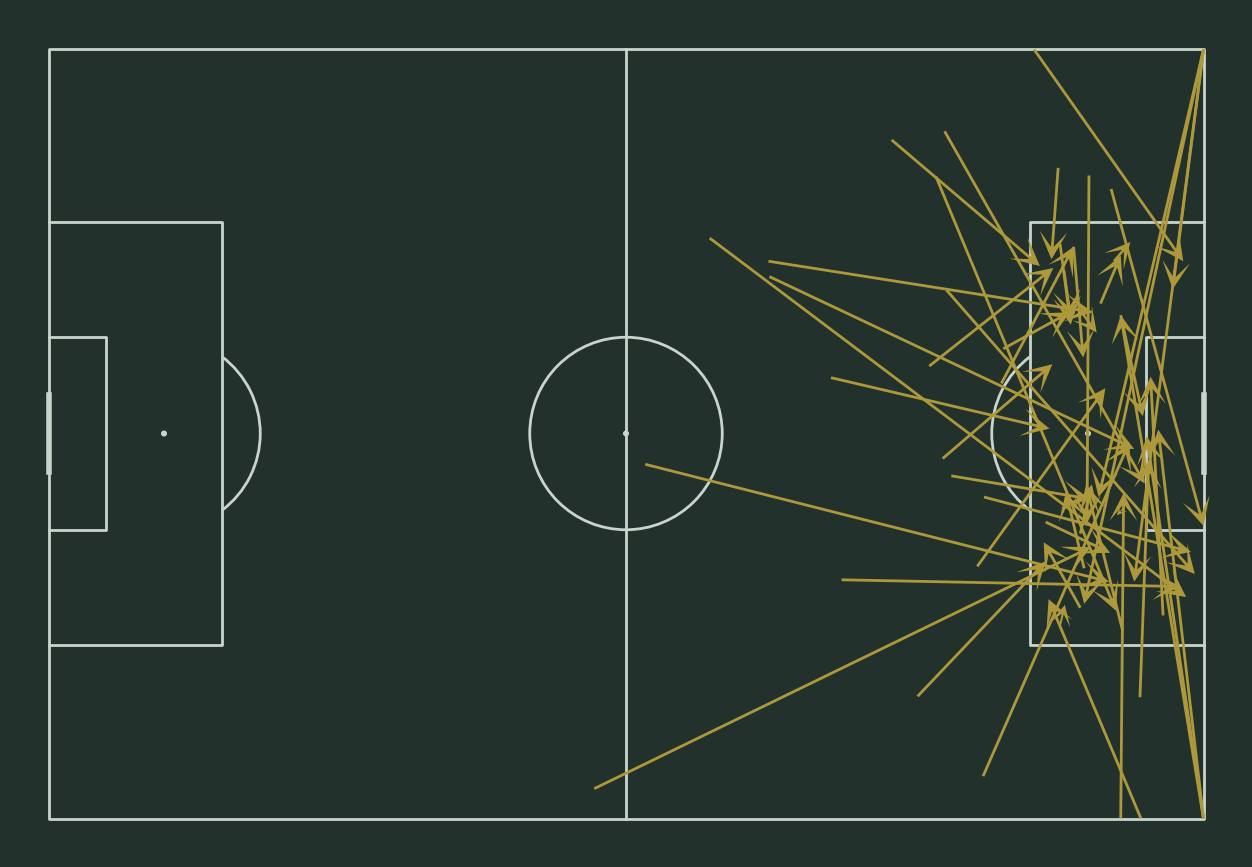

In [8]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# Plot the completed passes
pitch.arrows(df_pass_opposition_box.x,df_pass_opposition_box.y,
             df_pass_opposition_box.x_end,df_pass_opposition_box.y_end, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

In this section of the code, the goal is to determine which player made the most passes in the opponent's penalty area and present this information clearly.

In [10]:
countpass = df_pass_opposition_box['player'].value_counts()
print(countpass)
joueur_max_passes = countpass.idxmax()  
nombre_max_passes = countpass.max()
print(f"The player with the most passes is {joueur_max_passes} with {nombre_max_passes} passes.")

player
Luke Shaw                 7
Philip Foden              7
Jordan Brian Henderson    5
Harry Kane                3
Jack Grealish             3
Jude Bellingham           3
Marcus Rashford           3
Daniel James              3
Callum Wilson             2
Harry Maguire             2
John Stones               2
Kyle Walker               2
Trent Alexander-Arnold    2
Ethan Ampadu              1
Connor Roberts            1
Brennan Johnson           1
Neco Williams             1
Harry Wilson              1
Name: count, dtype: int64
The player with the most passes is Luke Shaw with 7 passes.


Objective of the Function: This function aims to identify the player who made the most passes throughout a given match. Additionally, it helps visualize the role of this player in the game.

In [13]:
def players_frequently_passed_the_ball_into_the_opposition_box(match_id):
    matches = sb.matches(competition_id=43, season_id=106)
    event = sb.events(match_id)
    passes = event[event['type'] == 'Pass']
    
    # Utilisation de .loc pour éviter le warning
    df_pass = passes[['match_id', 'location', 'pass_end_location', 'pass_outcome', 'player']].copy()

    df_pass.loc[:, 'x'] = df_pass['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    df_pass.loc[:, 'y'] = df_pass['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    df_pass.loc[:, 'x_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    df_pass.loc[:, 'y_end'] = df_pass['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    df_pass_opposition_box = df_pass[(df_pass['x_end'] >= 103) & (df_pass['x_end'] <= 120) & 
                                      (df_pass['y_end'] >= 20) & (df_pass['y_end'] <= 60)]

    countpass = df_pass_opposition_box['player'].value_counts()
    joueur_max_passes = countpass.idxmax()  
    nombre_max_passes = countpass.max()
    
    return joueur_max_passes, nombre_max_passes, df_pass_opposition_box
    
    
    
    

By applying this function to the match between Portugal and Morocco, we will be able to better understand the contributions of each player in terms of passes, while highlighting the player who had the greatest impact during the game. This analysis will deepen our understanding of the match's dynamics and individual performances.

In [14]:

players_frequently_passed_the_ball_into_the_opposition_box(3869486)

('Bruno Miguel Borges Fernandes',
 14,
      match_id       location pass_end_location pass_outcome  \
 12    3869486   [45.4, 58.5]     [111.4, 35.7]   Incomplete   
 58    3869486   [78.2, 73.0]     [106.8, 44.2]          NaN   
 59    3869486  [120.0, 80.0]     [115.1, 44.4]   Incomplete   
 66    3869486  [115.7, 22.0]     [116.3, 25.2]   Incomplete   
 67    3869486   [120.0, 0.1]     [112.7, 39.4]          NaN   
 ..        ...            ...               ...          ...   
 956   3869486  [113.8, 73.9]     [113.5, 41.6]   Incomplete   
 959   3869486   [79.8, 50.7]     [120.0, 26.0]          Out   
 978   3869486   [92.6, 68.9]     [116.7, 24.1]   Incomplete   
 979   3869486  [111.2, 12.1]     [114.1, 44.5]          NaN   
 983   3869486   [88.4, 17.2]     [104.3, 54.7]   Incomplete   
 
                               player      x     y  x_end  y_end  
 12      Kléper Laveran Lima Ferreira   45.4  58.5  111.4   35.7  
 58     Bruno Miguel Borges Fernandes   78.2  73.0  106.8

This code iterates through each match in the database, displays the match details, including the match ID and the home and away teams, and then calls the function `players_frequently_passed_the_ball_into_the_opposition_box` to analyze the passes made by players during each encounter.

Match ID: 3857256
Équipe à domicile: Serbia
Équipe à l'extérieur: Switzerland
Le joueur avec le plus de passes est Filip Kostić avec 12 passes.


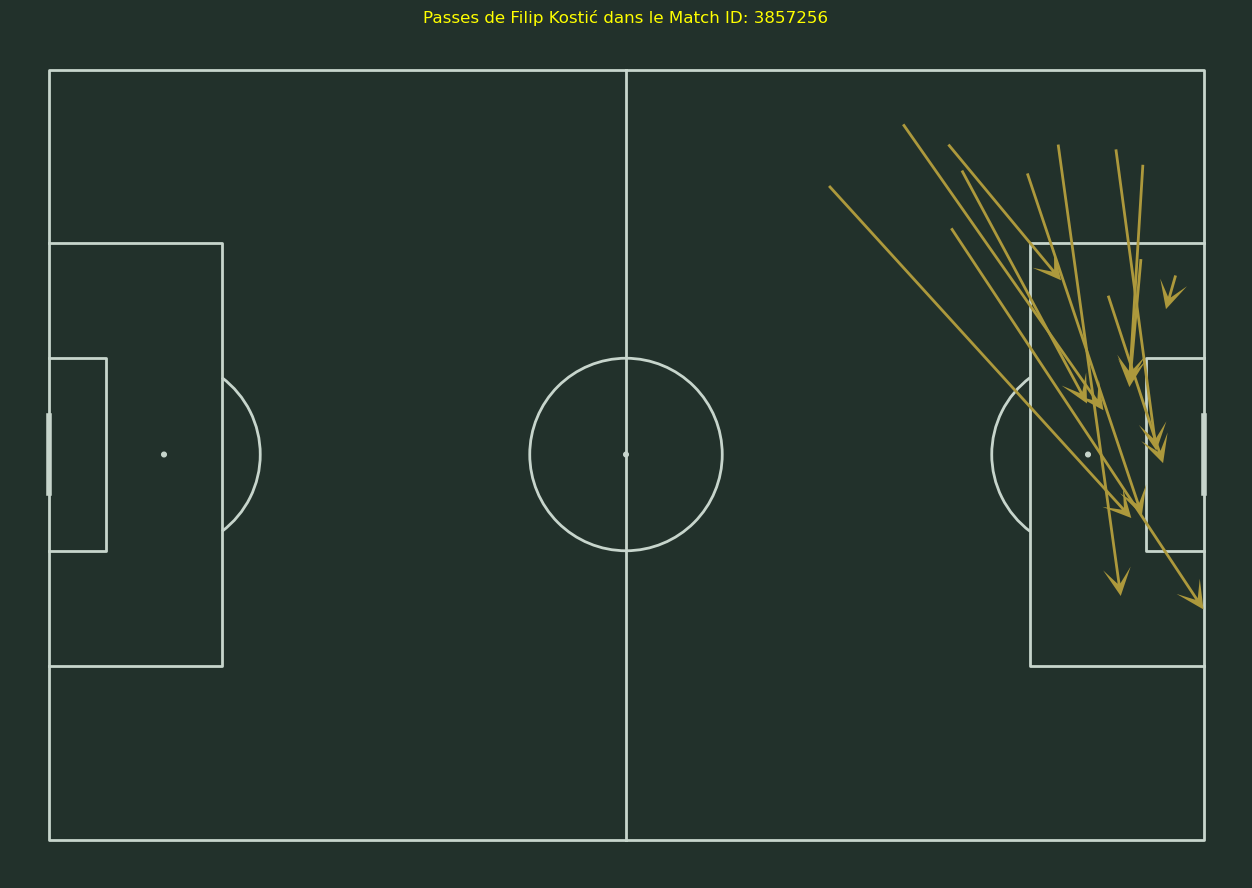

Match ID: 3869151
Équipe à domicile: Argentina
Équipe à l'extérieur: Australia
Le joueur avec le plus de passes est Craig Goodwin avec 7 passes.


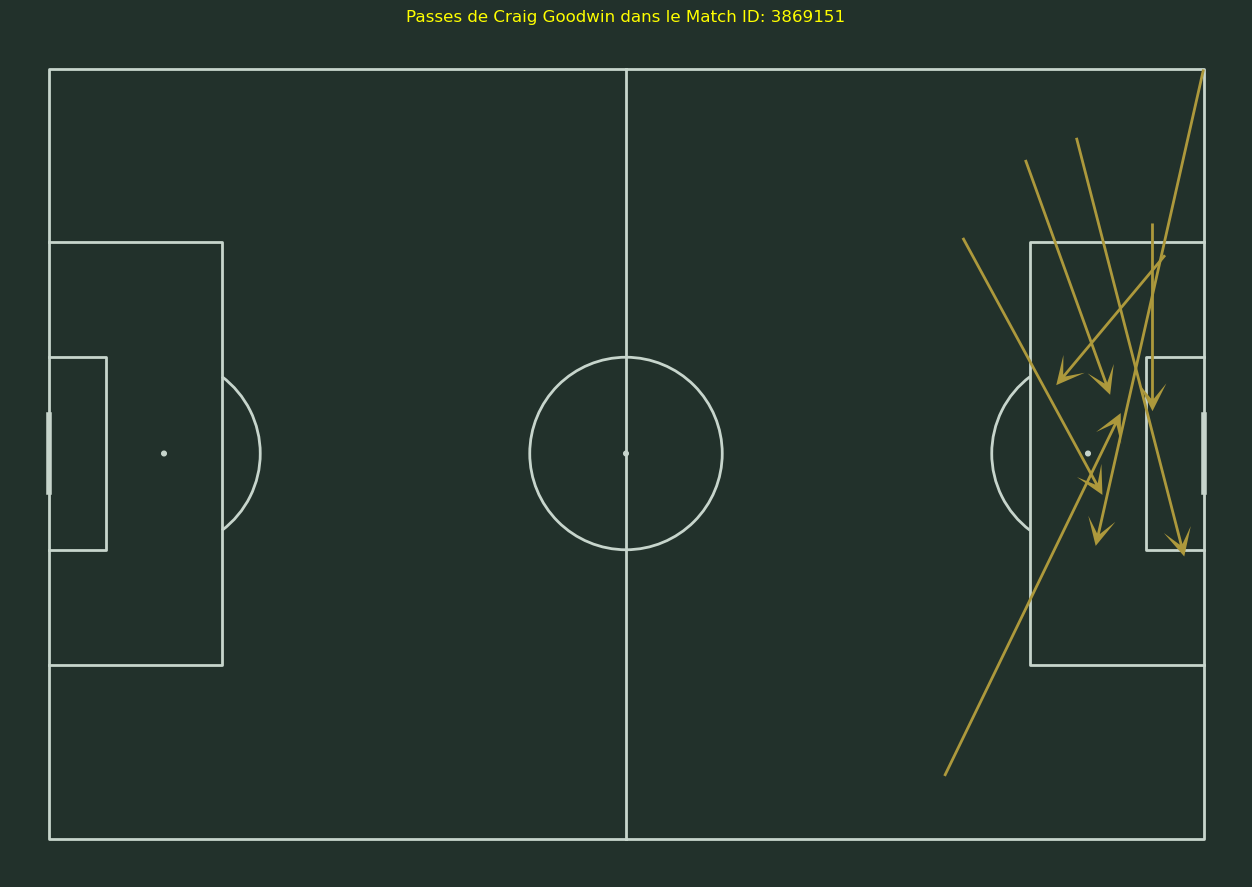

Match ID: 3857257
Équipe à domicile: Australia
Équipe à l'extérieur: Denmark
Le joueur avec le plus de passes est Christian Dannemann Eriksen avec 12 passes.


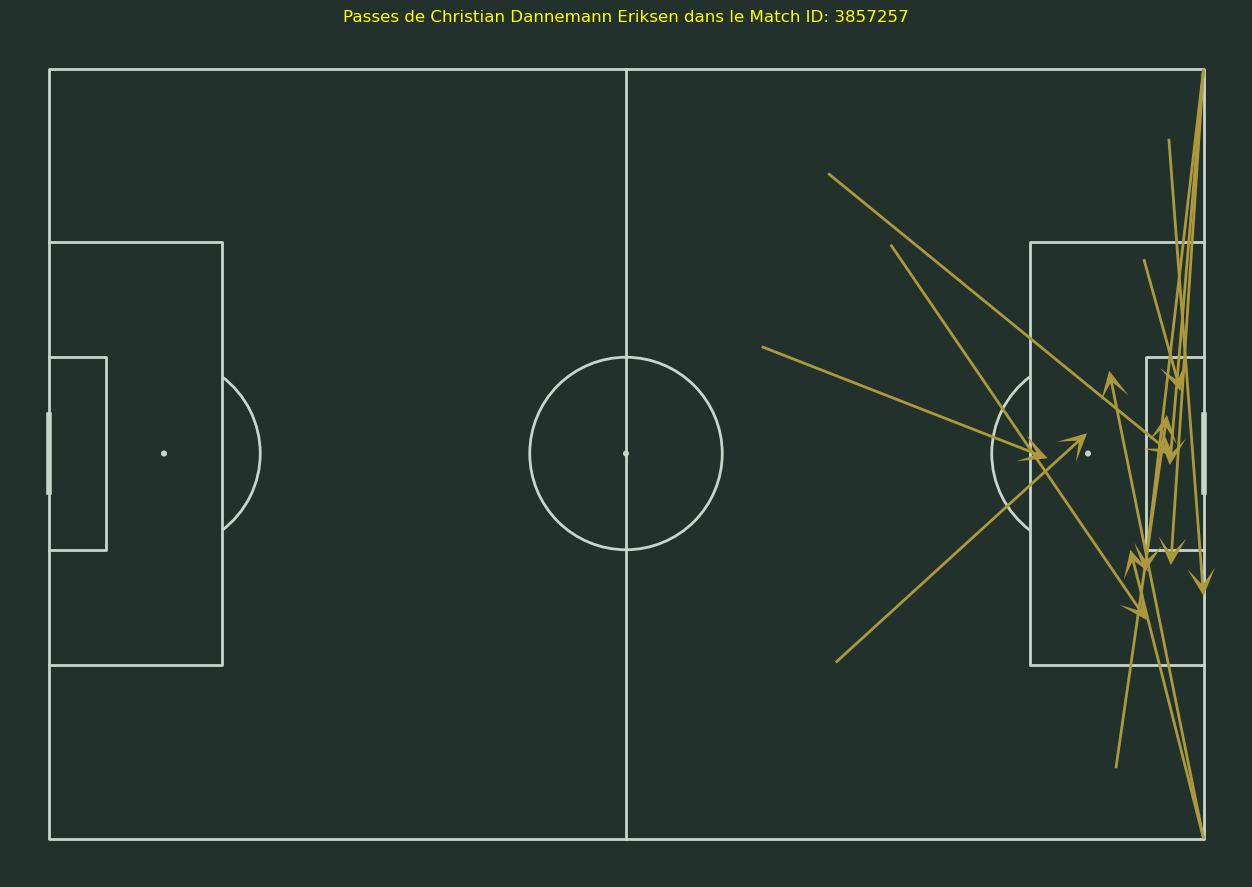

Match ID: 3857258
Équipe à domicile: Brazil
Équipe à l'extérieur: Serbia
Le joueur avec le plus de passes est Raphael Dias Belloli avec 7 passes.


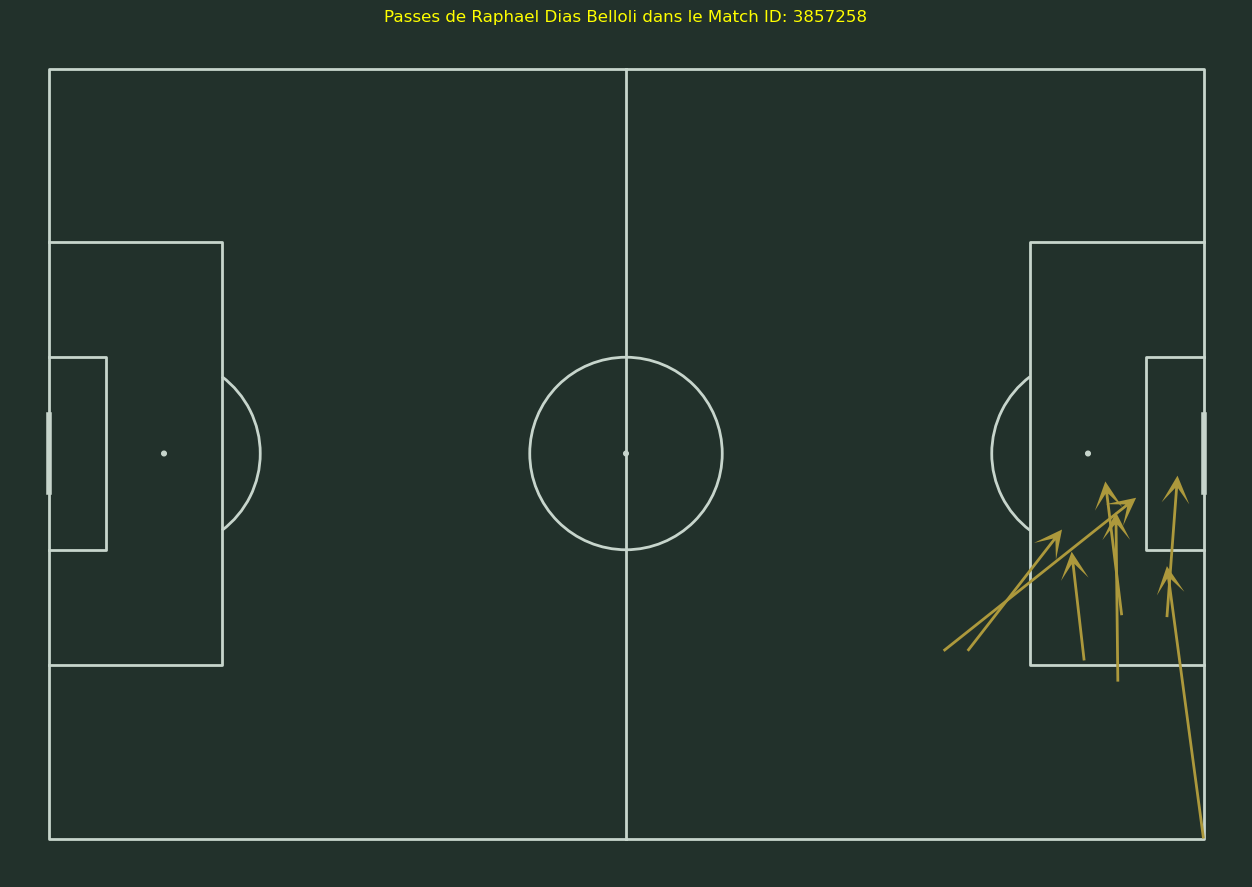

Match ID: 3857288
Équipe à domicile: Tunisia
Équipe à l'extérieur: Australia
Le joueur avec le plus de passes est Naïm Sliti avec 15 passes.


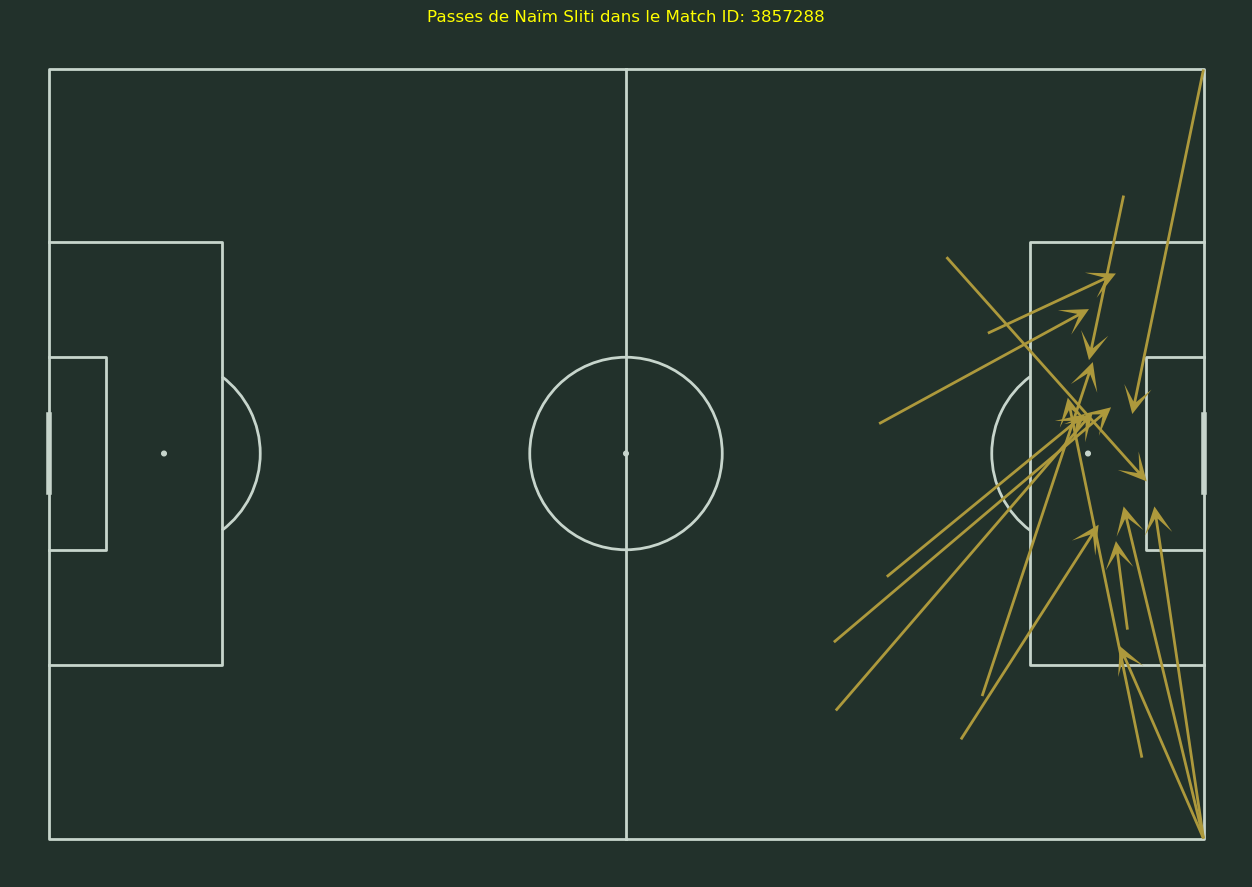

Match ID: 3857267
Équipe à domicile: Ecuador
Équipe à l'extérieur: Senegal
Le joueur avec le plus de passes est Ismail Jakobs avec 8 passes.


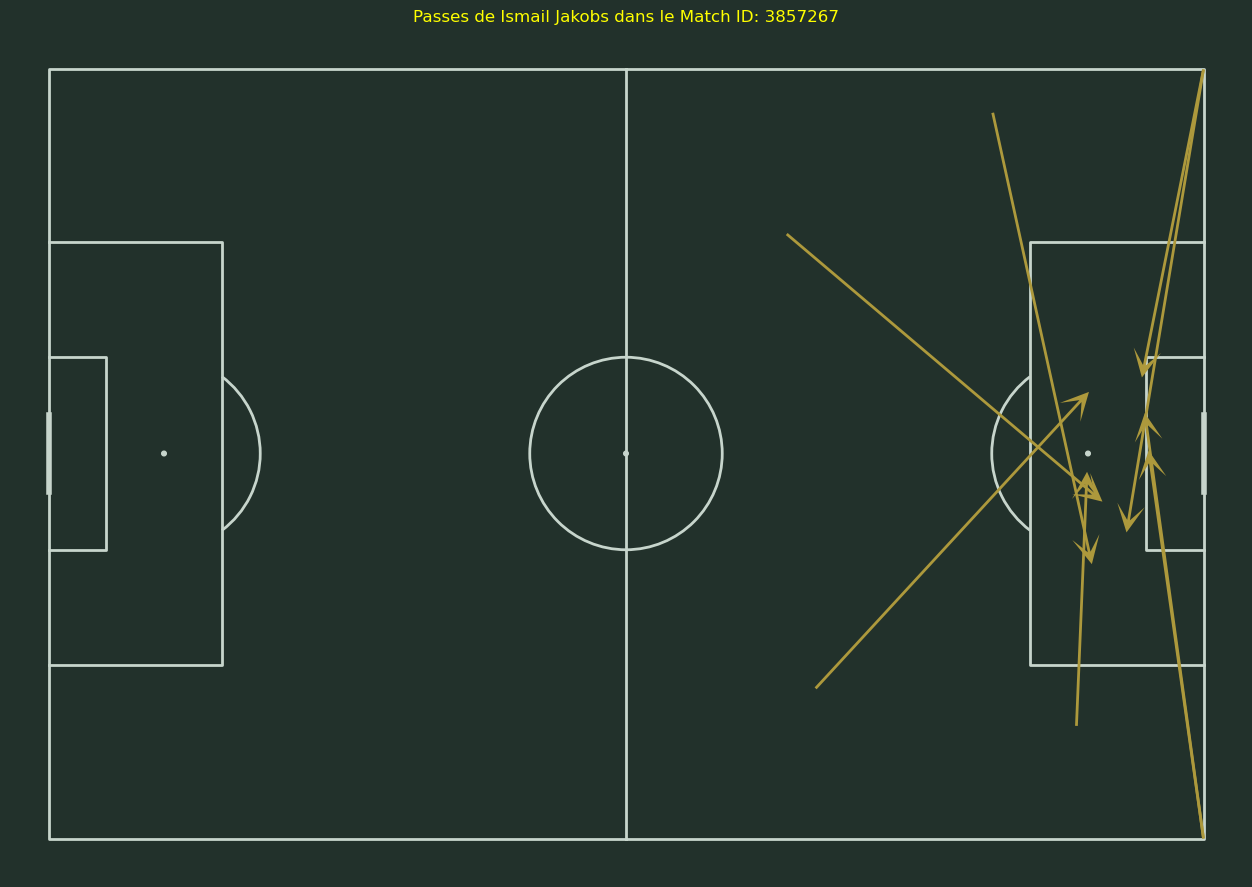

Match ID: 3869321
Équipe à domicile: Netherlands
Équipe à l'extérieur: Argentina
Le joueur avec le plus de passes est Cody Mathès Gakpo avec 11 passes.


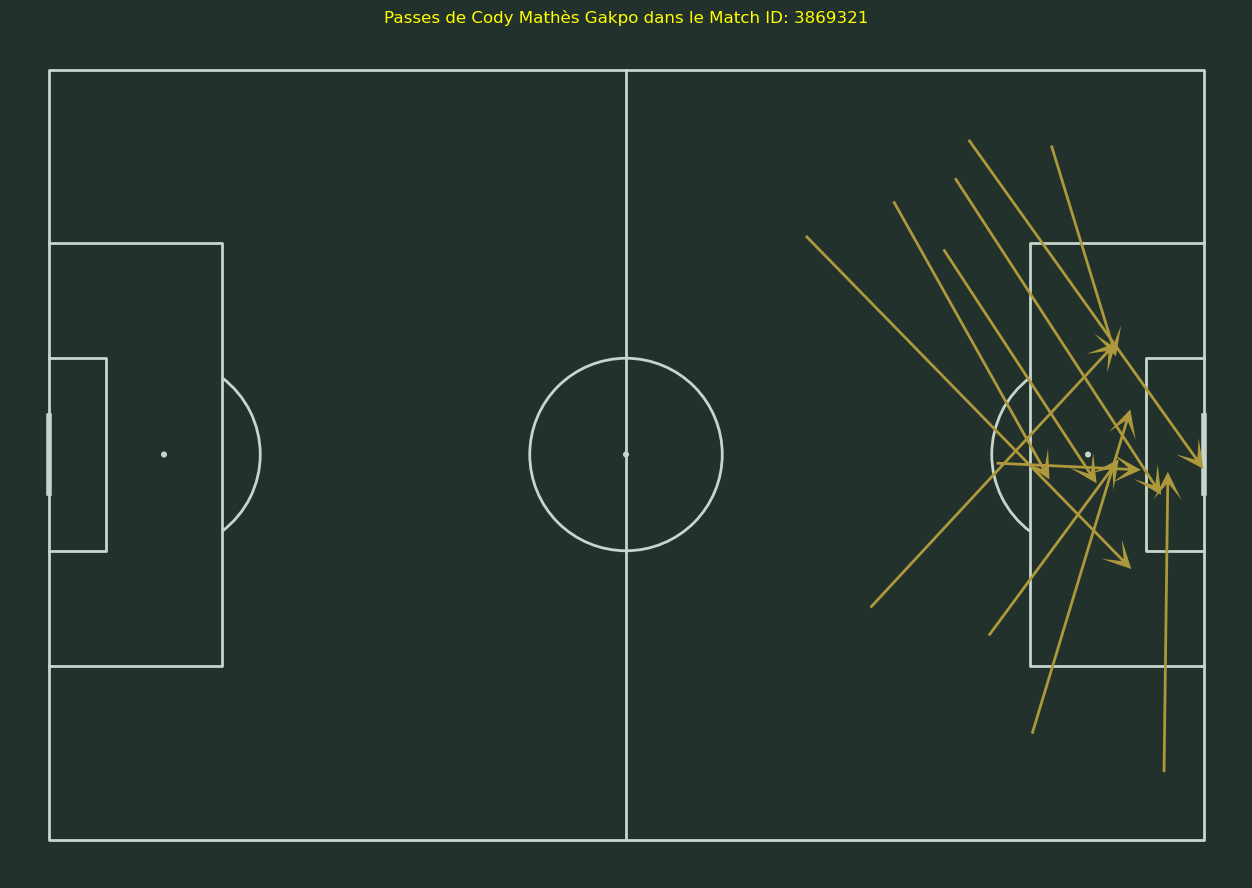

Match ID: 3857287
Équipe à domicile: Uruguay
Équipe à l'extérieur: South Korea
Le joueur avec le plus de passes est Federico Santiago Valverde Dipetta avec 8 passes.


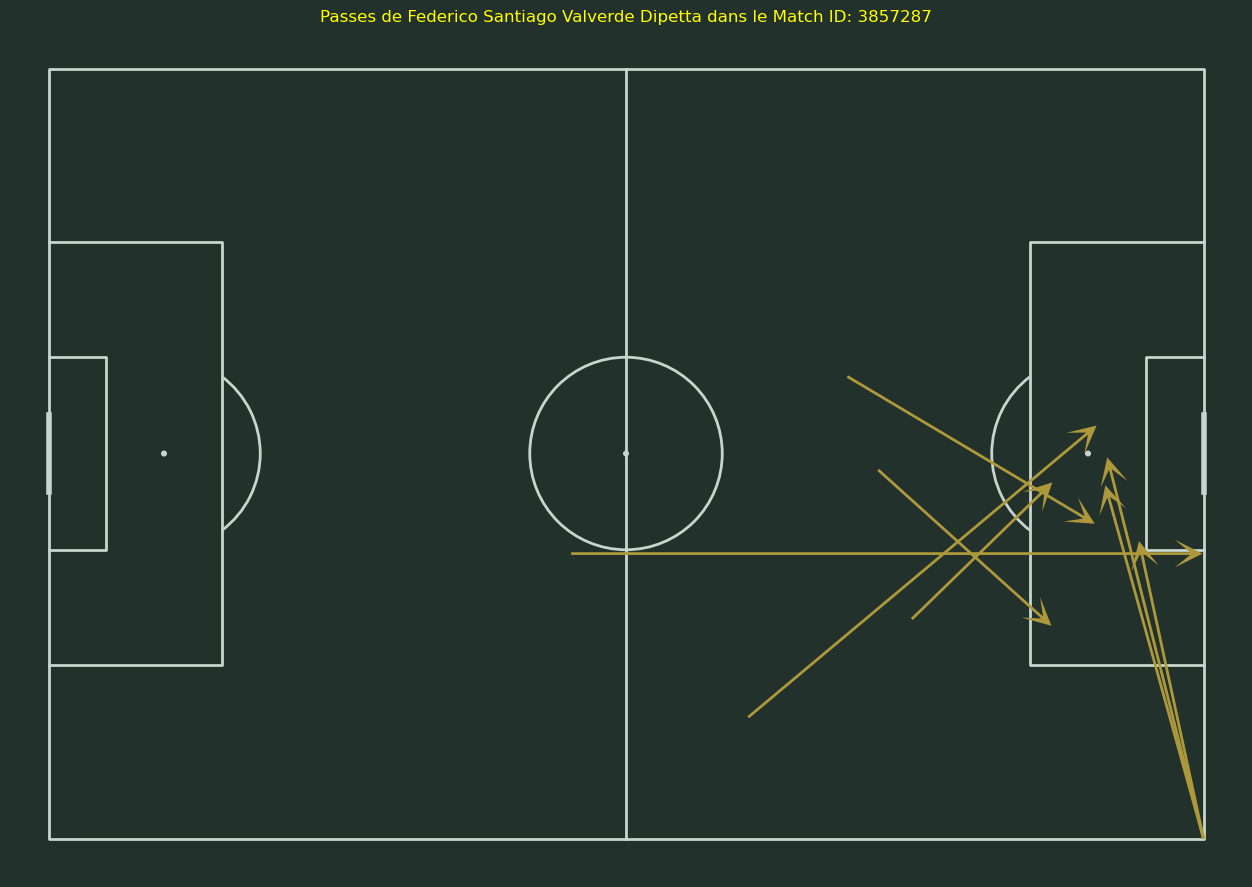

Match ID: 3869486
Équipe à domicile: Morocco
Équipe à l'extérieur: Portugal
Le joueur avec le plus de passes est Bruno Miguel Borges Fernandes avec 14 passes.


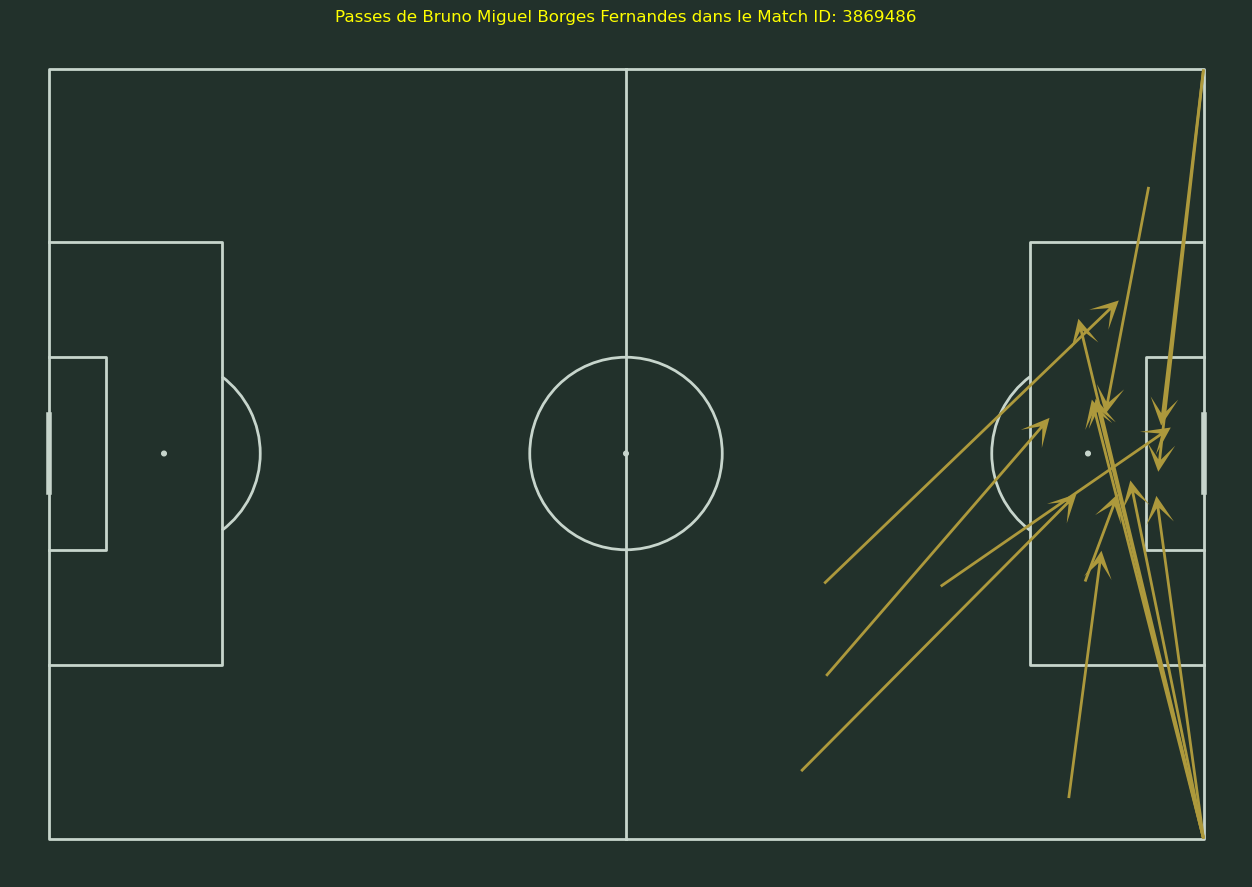

Match ID: 3869685
Équipe à domicile: Argentina
Équipe à l'extérieur: France
Le joueur avec le plus de passes est Lionel Andrés Messi Cuccittini avec 9 passes.


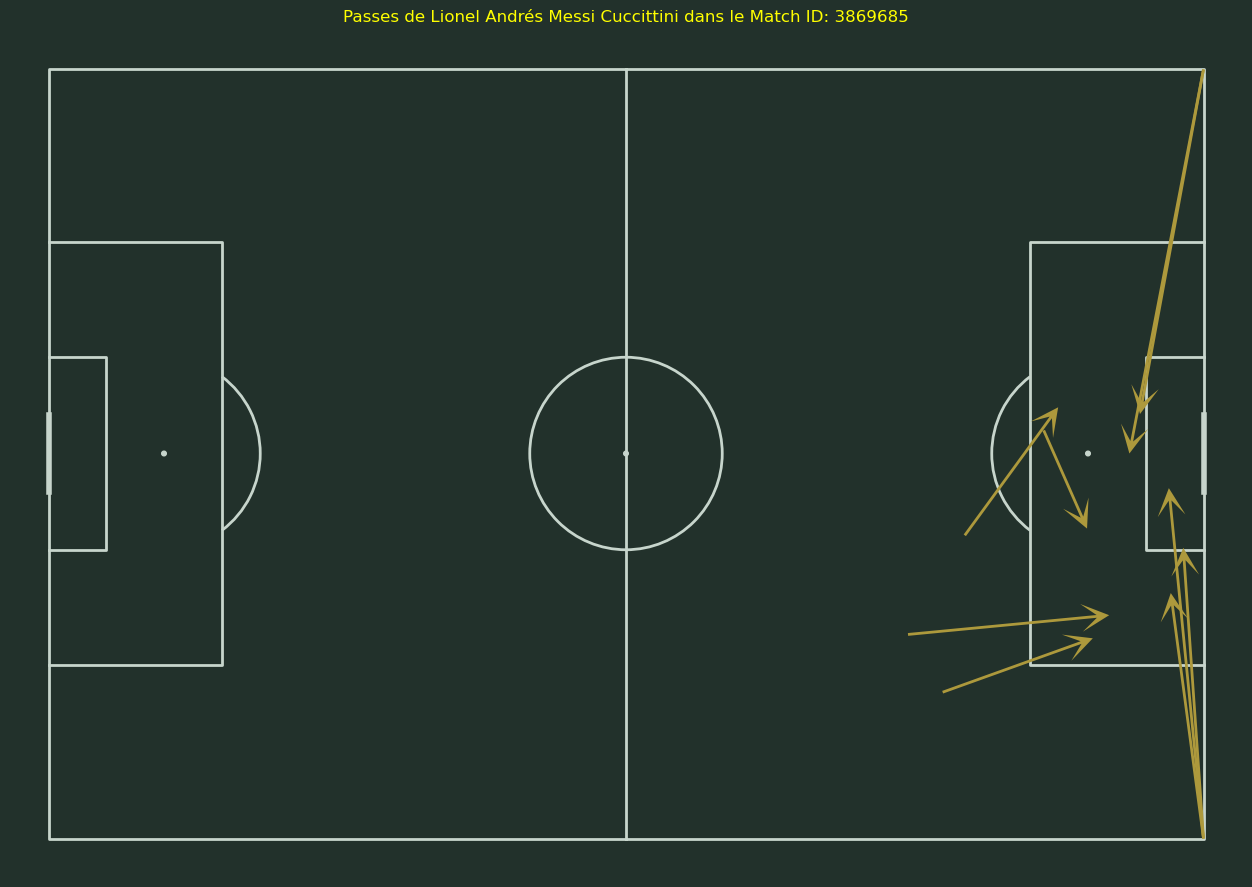

Match ID: 3857260
Équipe à domicile: Saudi Arabia
Équipe à l'extérieur: Mexico
Le joueur avec le plus de passes est Hirving Rodrigo Lozano Bahena avec 10 passes.


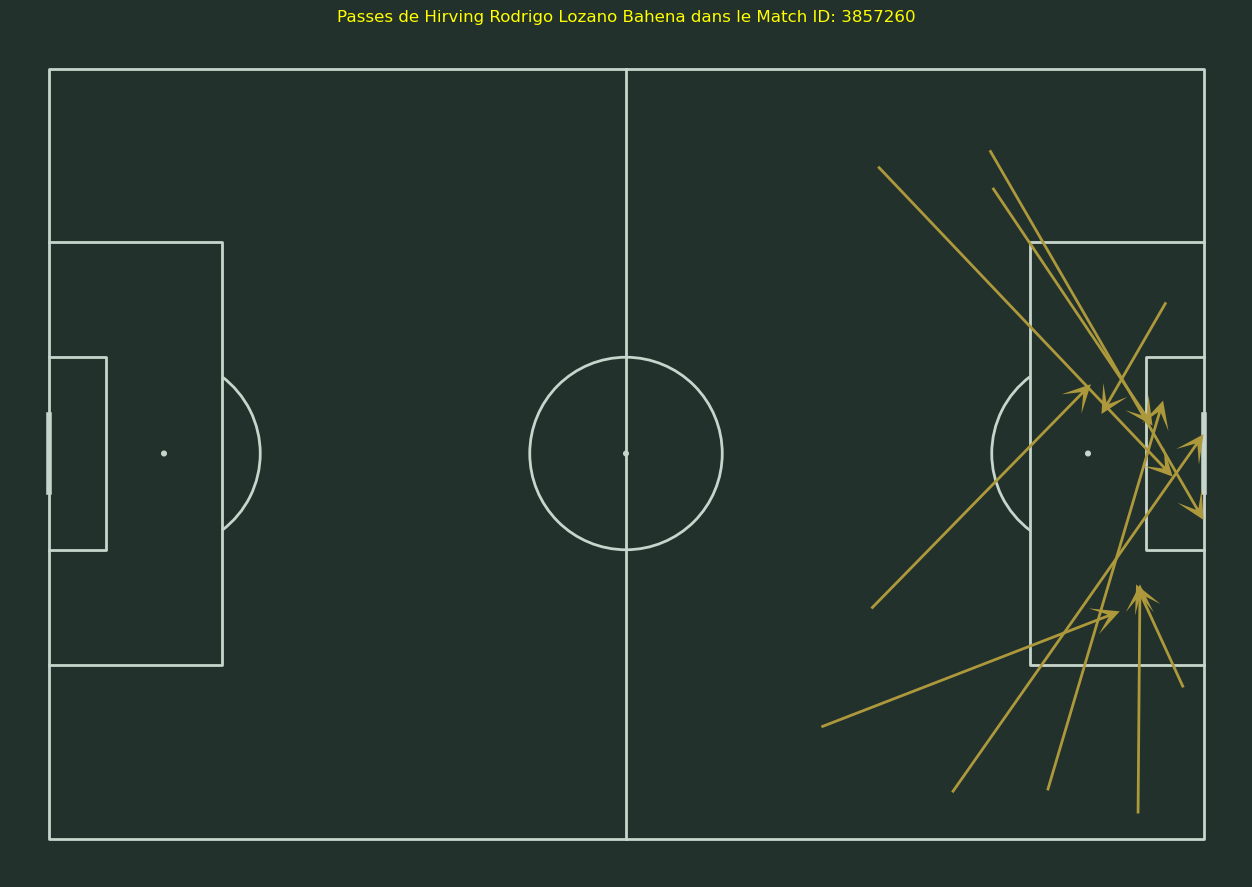

Match ID: 3857264
Équipe à domicile: Poland
Équipe à l'extérieur: Argentina
Le joueur avec le plus de passes est Ángel Fabián Di María Hernández avec 12 passes.


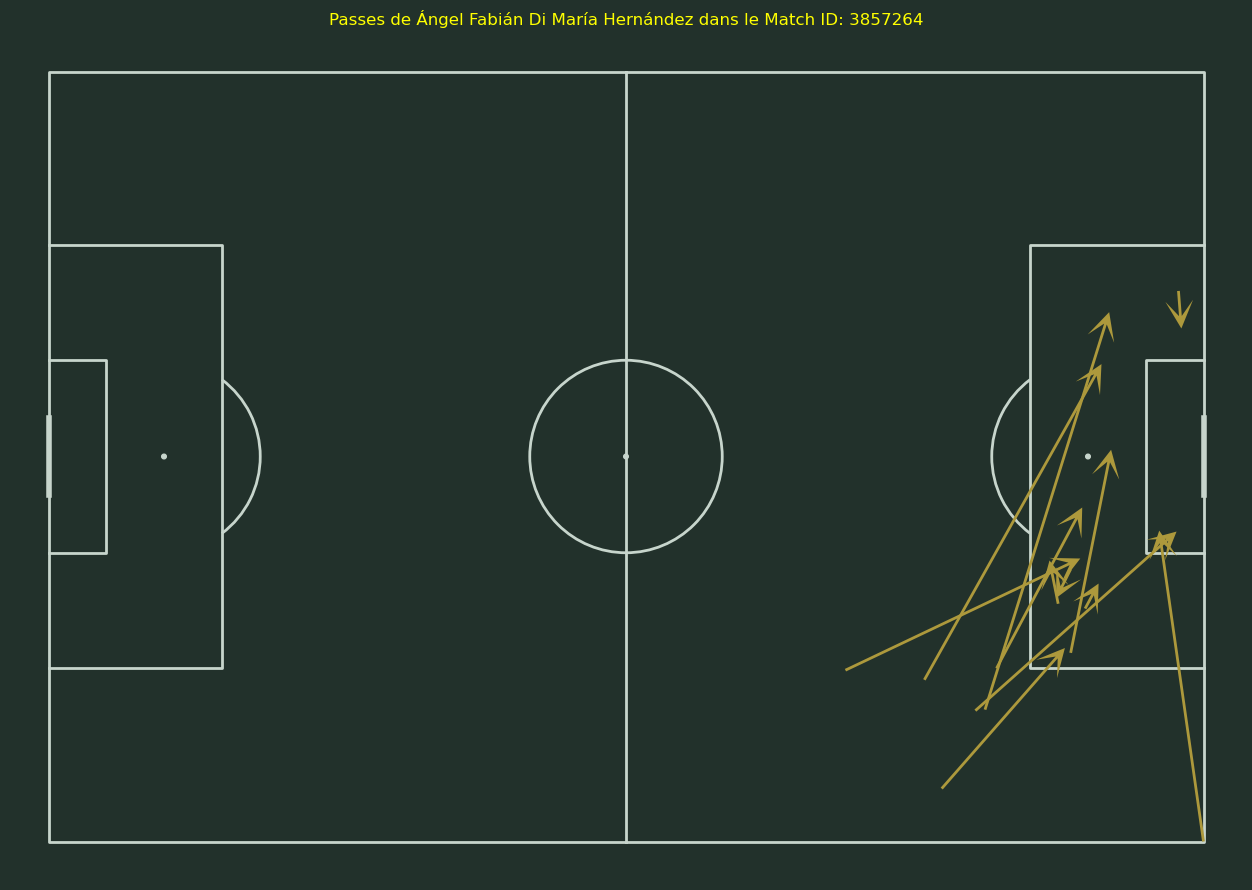

Match ID: 3857266
Équipe à domicile: France
Équipe à l'extérieur: Denmark
Le joueur avec le plus de passes est Antoine Griezmann avec 10 passes.


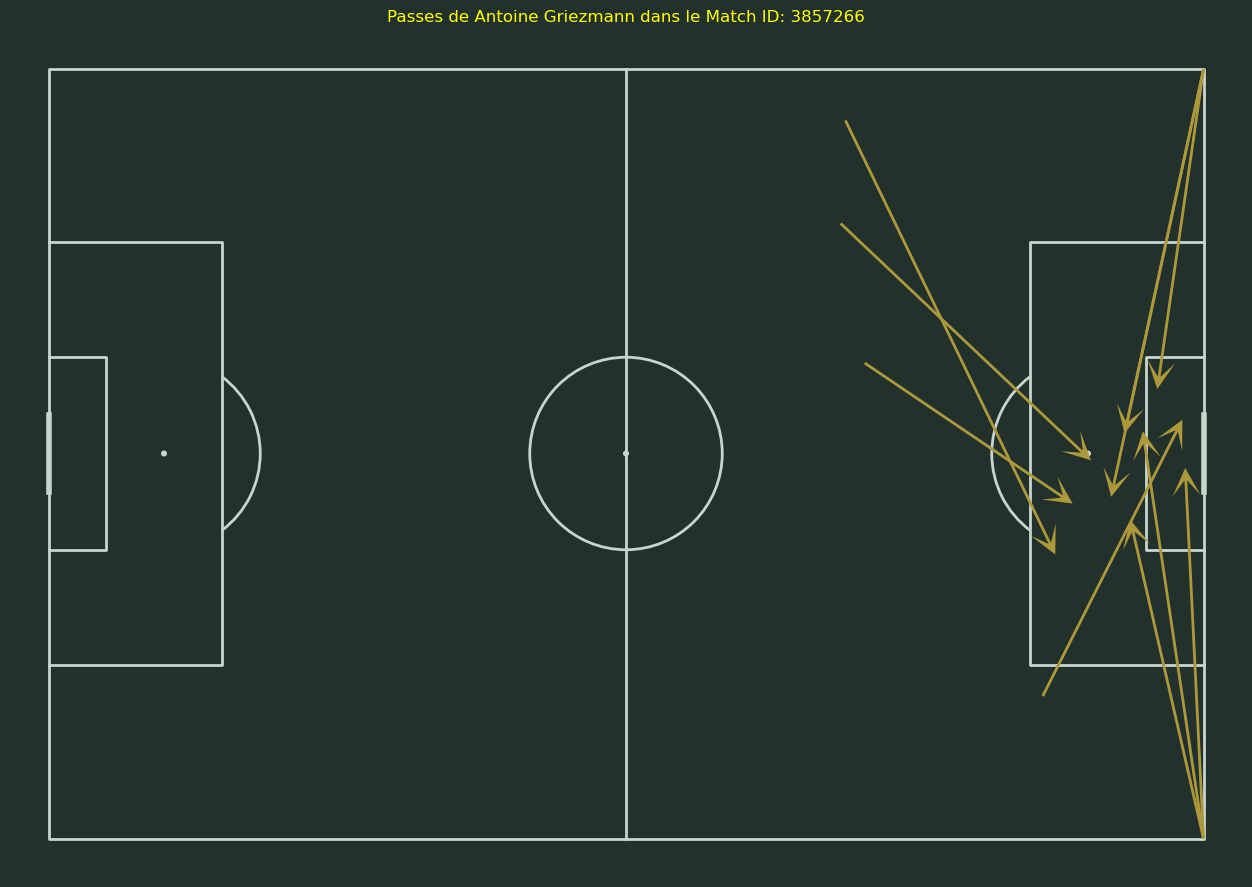

Match ID: 3857289
Équipe à domicile: Argentina
Équipe à l'extérieur: Mexico
Le joueur avec le plus de passes est Luis Gerardo Chávez Magallón avec 5 passes.


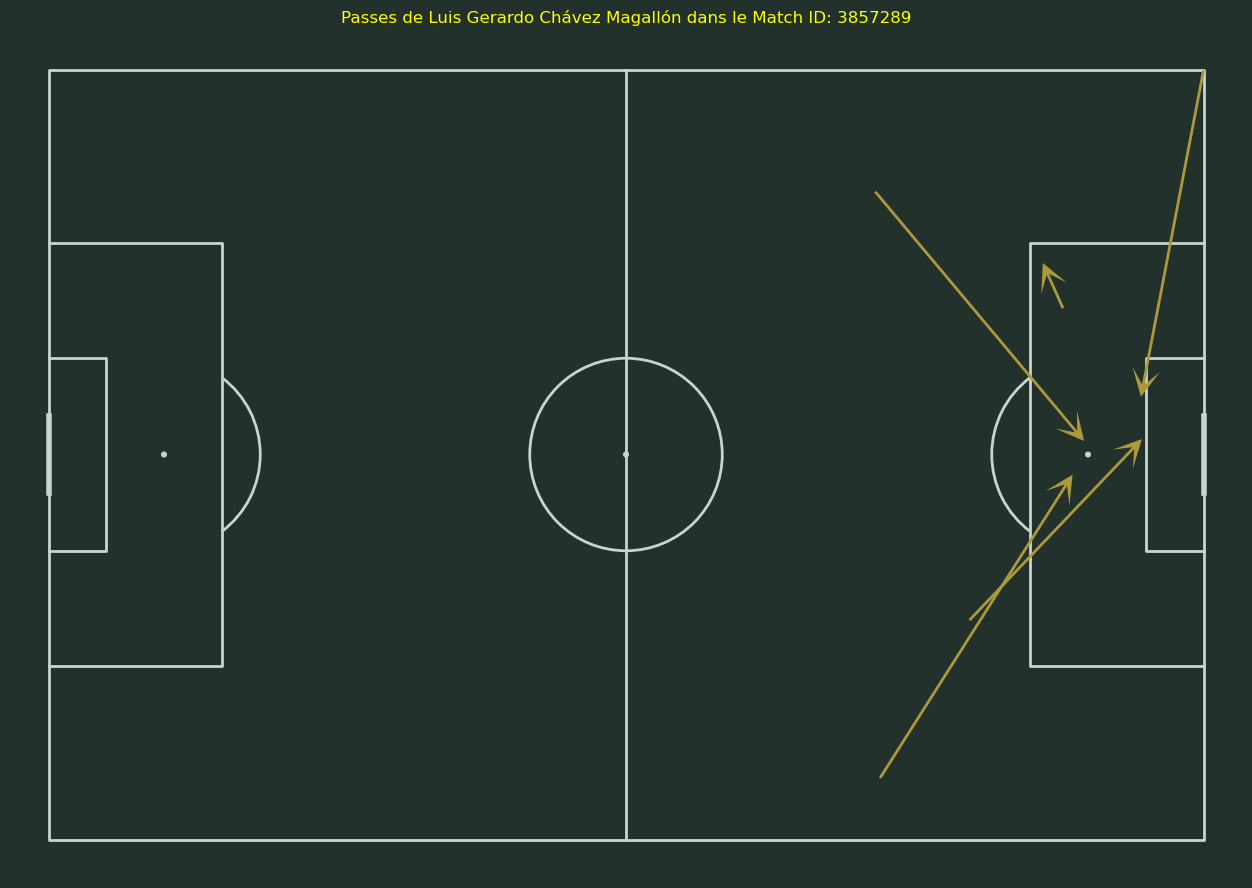

Match ID: 3857269
Équipe à domicile: Brazil
Équipe à l'extérieur: Switzerland
Le joueur avec le plus de passes est Raphael Dias Belloli avec 10 passes.


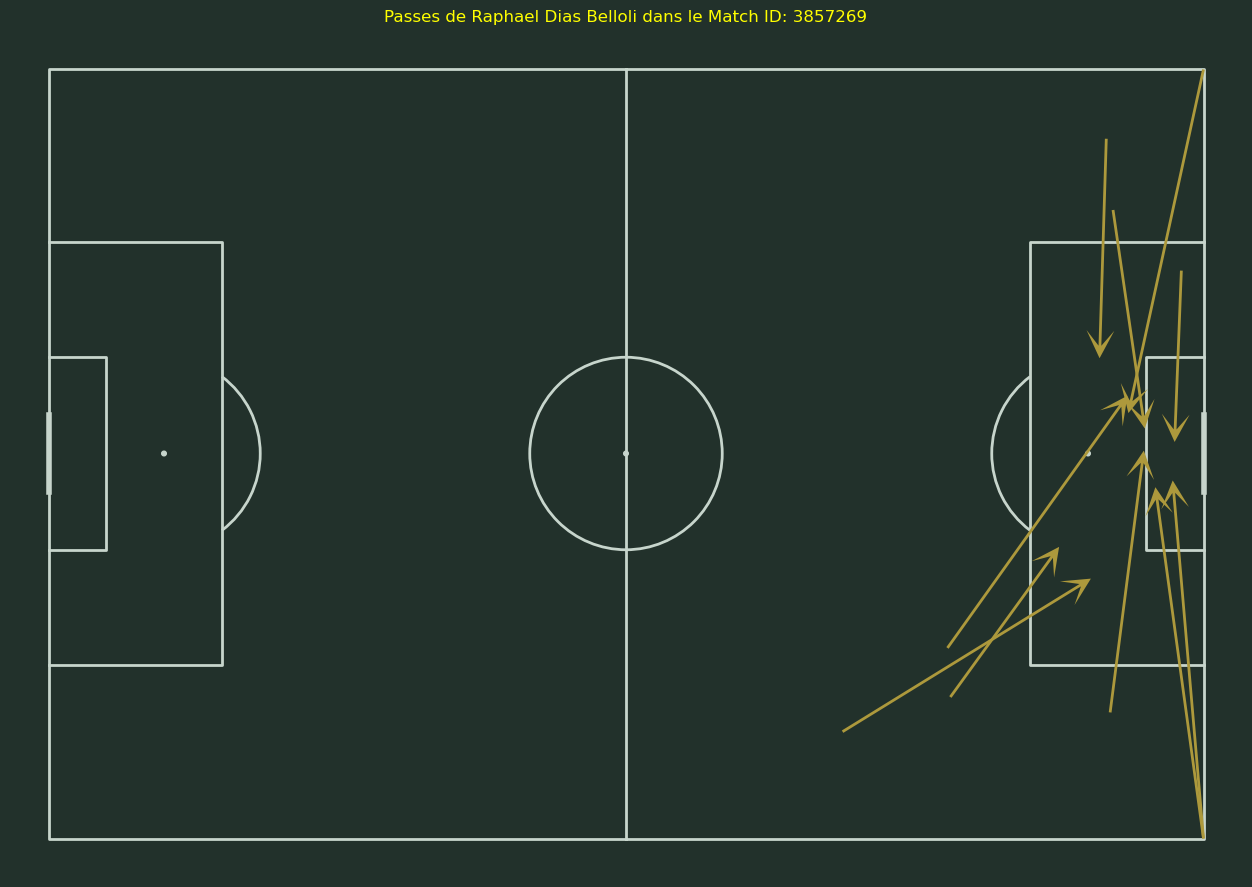

Match ID: 3857294
Équipe à domicile: Netherlands
Équipe à l'extérieur: Qatar
Le joueur avec le plus de passes est Daley Blind avec 7 passes.


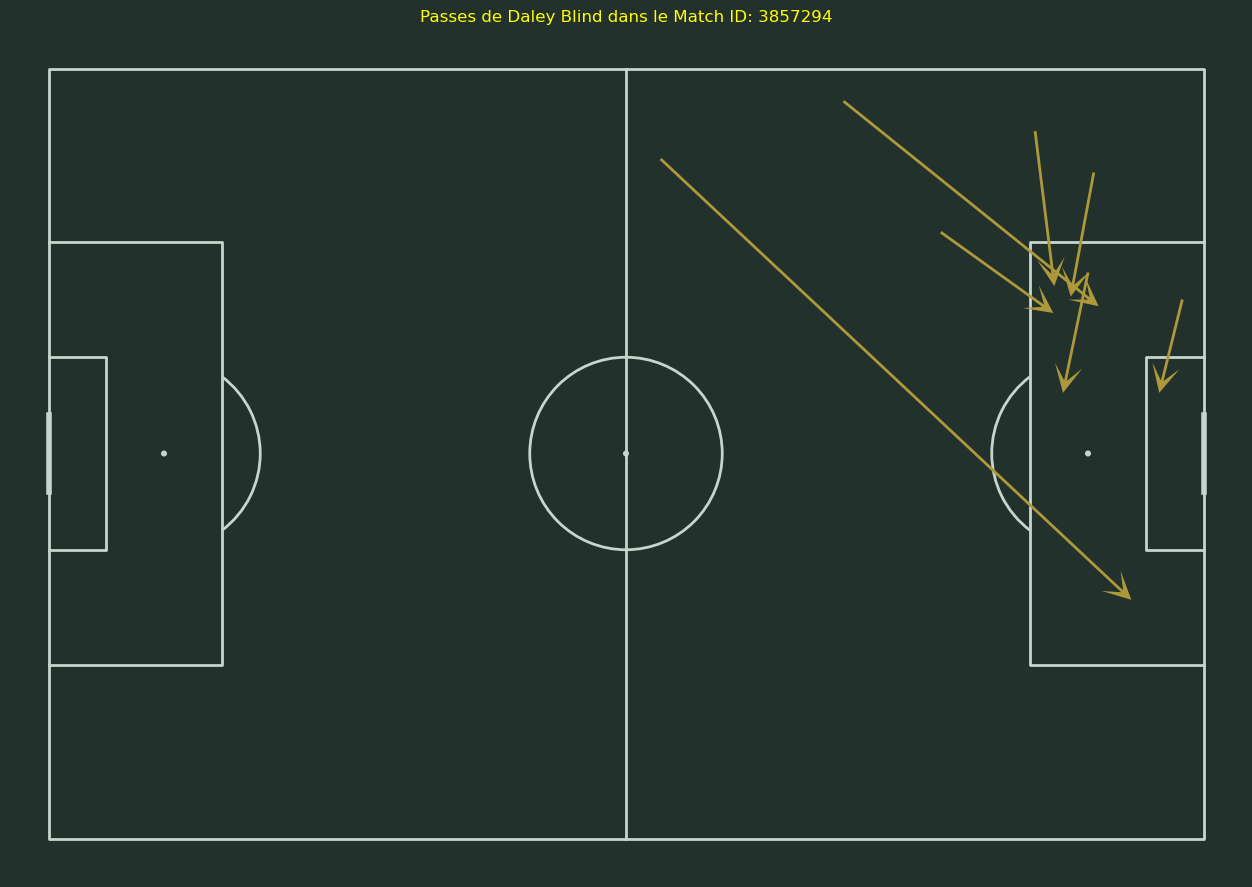

Match ID: 3869254
Équipe à domicile: Portugal
Équipe à l'extérieur: Switzerland
Le joueur avec le plus de passes est Bruno Miguel Borges Fernandes avec 7 passes.


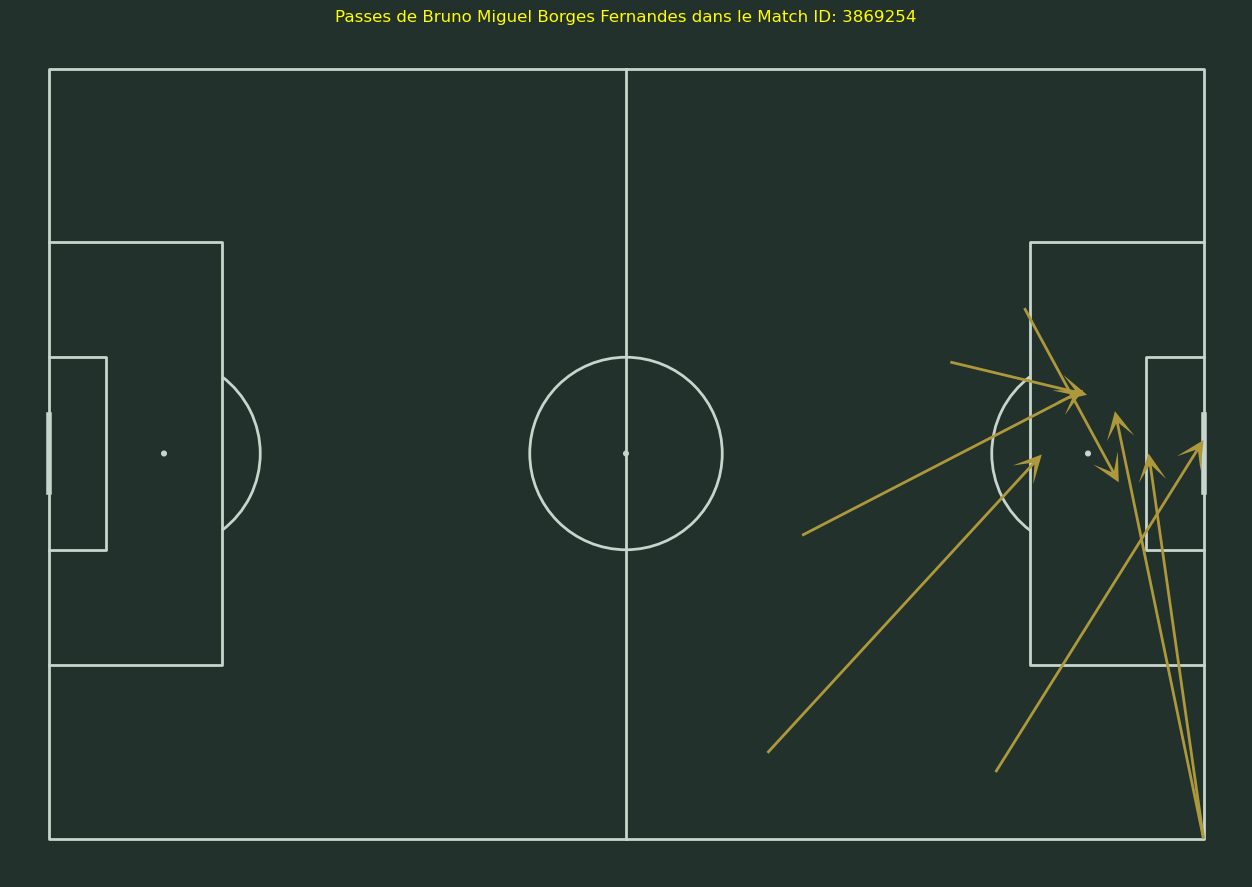

Match ID: 3869118
Équipe à domicile: England
Équipe à l'extérieur: Senegal
Le joueur avec le plus de passes est Philip Foden avec 5 passes.


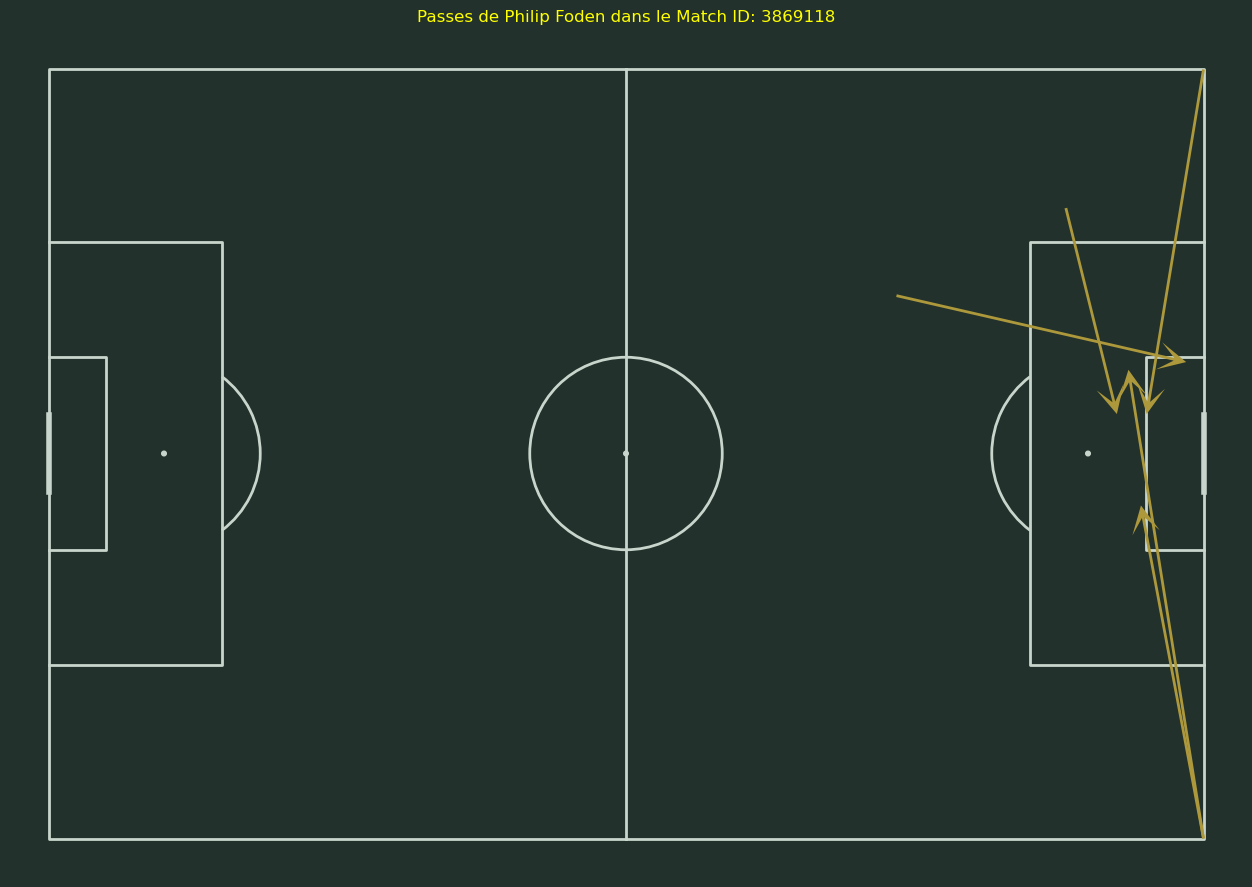

Match ID: 3869684
Équipe à domicile: Croatia
Équipe à l'extérieur: Morocco
Le joueur avec le plus de passes est Lovro Majer avec 9 passes.


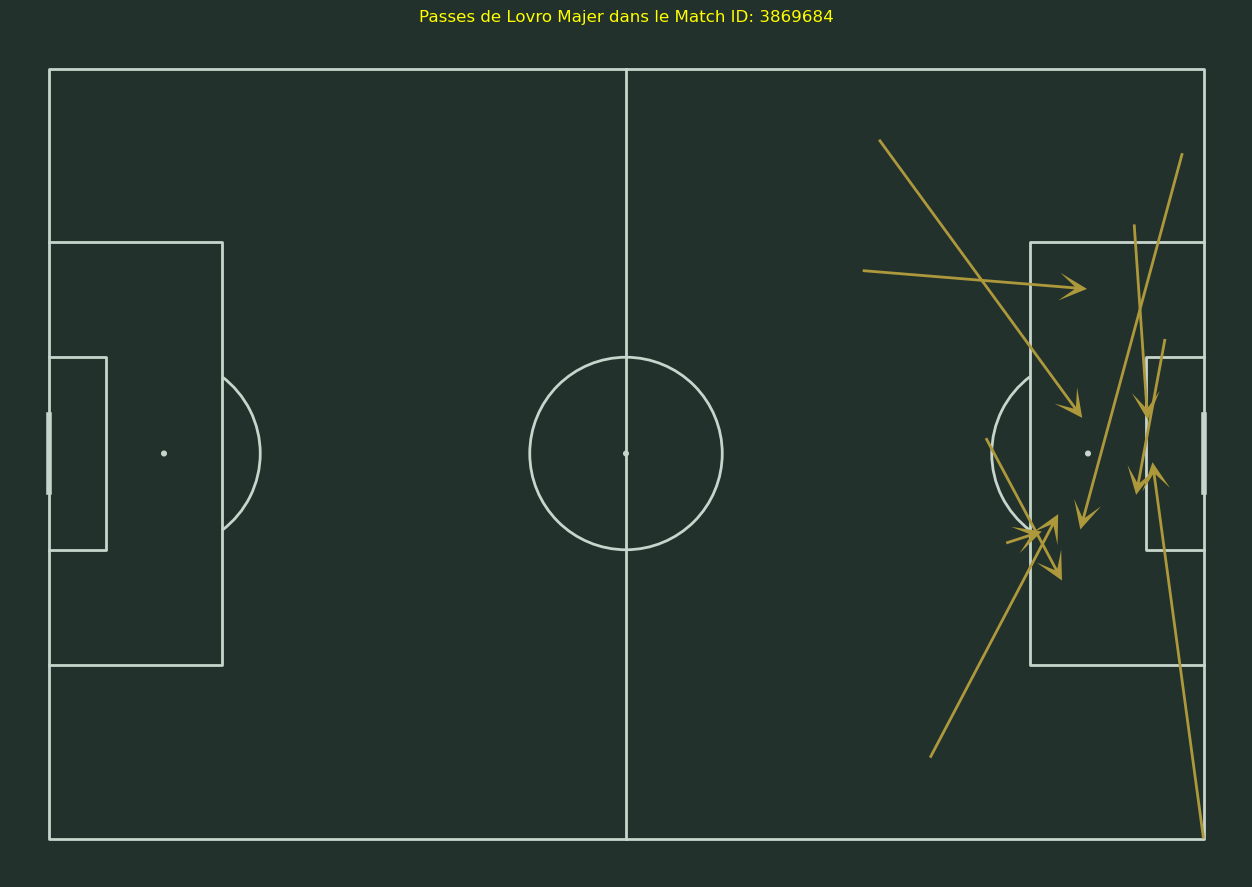

Match ID: 3869519
Équipe à domicile: Argentina
Équipe à l'extérieur: Croatia
Le joueur avec le plus de passes est Ivan Perišić avec 9 passes.


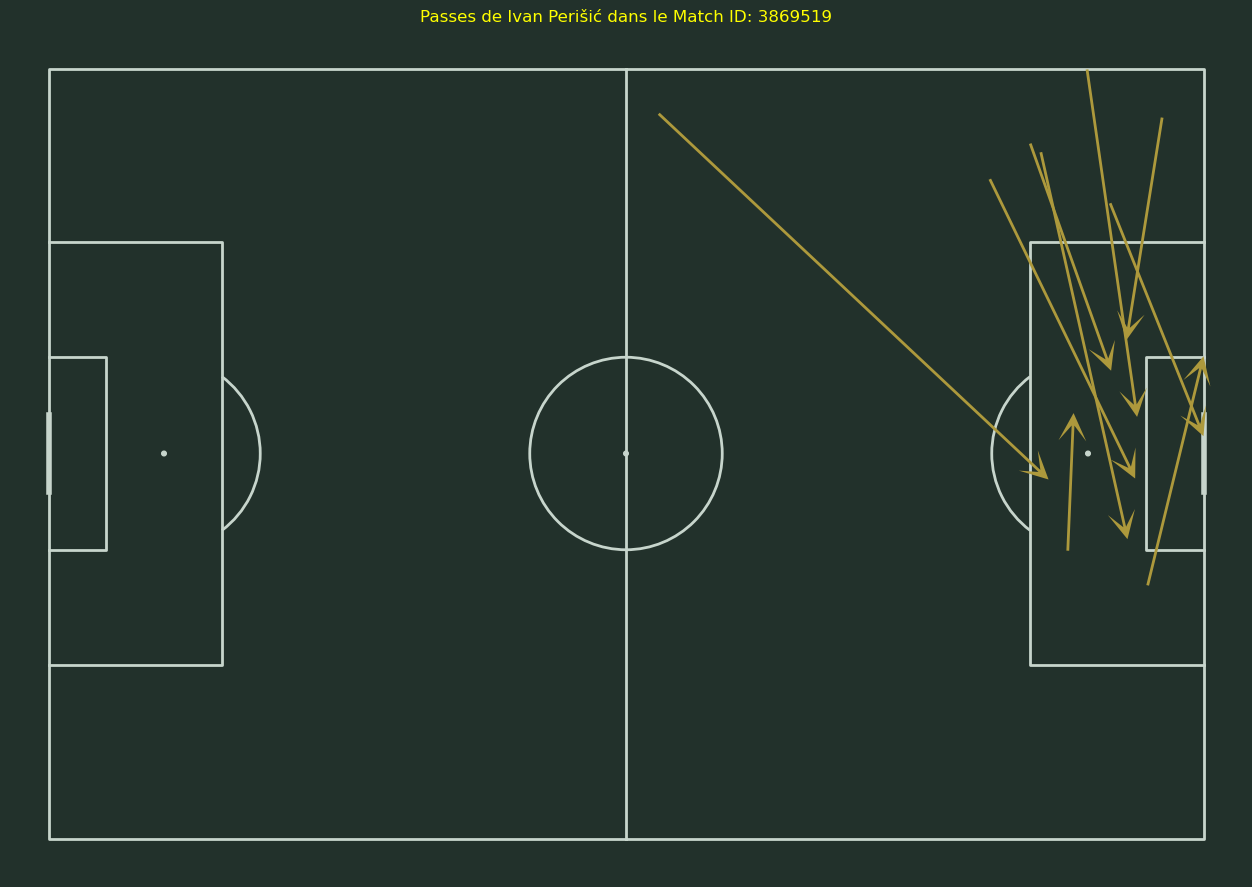

Match ID: 3869354
Équipe à domicile: England
Équipe à l'extérieur: France
Le joueur avec le plus de passes est Ousmane Dembélé avec 8 passes.


In [ ]:
for index, match in matches.iterrows():
    print(f"Match ID: {match['match_id']}")
    print(f"Équipe à domicile: {match['home_team']}")
    print(f"Équipe à l'extérieur: {match['away_team']}")

    joueur, passes_count, df_pass_opposition_box = players_frequently_passed_the_ball_into_the_opposition_box(match['match_id'])
    print(f"Le joueur avec le plus de passes est {joueur} avec {passes_count} passes.")
    

    passes_joueur_max = df_pass_opposition_box[df_pass_opposition_box['player'] == joueur]
    
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')
    
    
    pitch.arrows(passes_joueur_max.x, passes_joueur_max.y,
                 passes_joueur_max.x_end, passes_joueur_max.y_end, width=2,
                 headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

    plt.title(f"Passes de {joueur} dans le Match ID: {match['match_id']}", color='yellow') 
    plt.show()  

### Conclusion

The developed program allows for an in-depth analysis of player performances in football matches, specifically focusing on passes made into the opponent's penalty area. By utilizing the StatsBomb library, it extracts and visualizes player pass data from the 2022 World Cup matches, identifying those who most contributed to creating goal-scoring opportunities.

#### Utility for Coaches

This analysis is particularly beneficial for coaches and technical teams, as it provides valuable insights into players who play a key role in building attacks. By identifying players who can effectively pass into dangerous areas, coaches can:

- **Optimize Offensive Strategies:** Understand which player combinations are most effective in creating goal opportunities.
- **Develop Targeted Training Sessions:** Focus on improving the passing skills and decision-making of players who struggle with consistency in their passes to the opposing box.
- **Evaluate Individual and Collective Performances:** Use the data to adjust game tactics based on strengths and weaknesses observed in previous matches.

In summary, this pass analysis tool not only enriches the understanding of game dynamics but also serves as a strategic guide for improving team performances on the field.